# Description

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

In [1]:
# Import helpful libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

## Data upload

In [6]:
df = pd.read_csv(r"C:\Users\paul_\OneDrive\Documentos\Python Scripts\santander_customer_transaction_prediction/train.csv")

df_test = pd.read_csv(r"C:\Users\paul_\OneDrive\Documentos\Python Scripts\santander_customer_transaction_prediction/test.csv")

## Data preparation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
# Checking for any null/duplicate values

print((df.isnull().sum()/len(df)*100).sort_values(ascending=False),'\n')
print("Duplicate rows: ", df.duplicated().sum())

ID_code    0.0
target     0.0
var_0      0.0
var_1      0.0
var_2      0.0
          ... 
var_195    0.0
var_196    0.0
var_197    0.0
var_198    0.0
var_199    0.0
Length: 202, dtype: float64 

Duplicate rows:  0


In [10]:
# General description of the data
df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [9]:
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [11]:
# Separate the target for the model
target = df['target']

# Select the columns corresponding to the features, and preview the data
features = df.drop(['target', 'ID_code'], axis=1)
features.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [14]:
# Split the data into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=42)

target
0    135022
1     14978
Name: count, dtype: int64


<Axes: ylabel='proportion'>

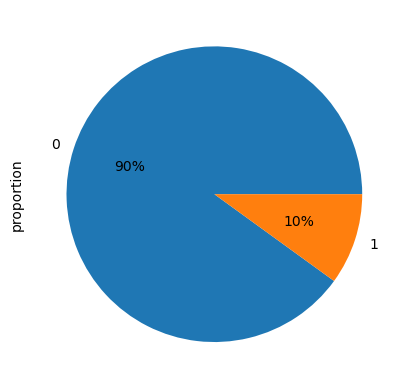

In [15]:
# Verify the unbalanced of classes with value_counts()
print(y_train.value_counts())
y_train.value_counts(normalize=True).plot(kind='pie', autopct='%.0f%%')

In [19]:
# LogisticRegression model
LR_model = LogisticRegression(
    solver='liblinear',
    class_weight='balanced', 
    max_iter=2000, 
    random_state=42
)

LR_model.fit(X_train, y_train)
predictions_valid_log = LR_model.predict_proba(X_valid)[:, 1]
auc_log = roc_auc_score(y_valid, predictions_valid_log)

# RandomForestClassifier model
RFC_model = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced',
    n_estimators=200,
    n_jobs=-1
)

RFC_model.fit(X_train, y_train)
predictions_valid_forest = RFC_model.predict_proba(X_valid)[:, 1]
auc_forest = roc_auc_score(y_valid, predictions_valid_forest)

In [21]:
# Compare results
print("ROC AUC Scores:")
print("LogisticRegression model: ", auc_log)
print("RandomForestClassifier model: ", auc_forest)

ROC AUC Scores:
LogisticRegression model:  0.8581008818655302
RandomForestClassifier model:  0.8055998787565453


In [22]:
# Training final model and getting the test validations to submit
df_test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [23]:
X_test = df_test.drop(['ID_code'], axis=1)

LR_model.fit(features, target)
predictions_test = LR_model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'ID_code' : df_test['ID_code'],
    'target' : predictions_test
})

submission.to_csv('submission.csv', index=False)

print("Submission preview:")
submission.head()

Submission preview:


ID_code    target
0  test_0  0.673338
1  test_1  0.752351
2  test_2  0.296935
3  test_3  0.685590
4  test_4  0.422617